<h1>Импортируем необходимые библиотеки и данные</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
url="./Loan_Defaulter.csv"

In [3]:
data = pd.read_csv(url, skiprows=[0])

In [4]:
data.shape

(30203, 25)

In [5]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [6]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
30198,29996,220000,male,high school,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
30199,29997,150000,male,high school,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,not default
30200,29998,30000,male,university,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,default
30201,29999,80000,male,high school,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,default
30202,30000,50000,male,university,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,default


In [7]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

<h1>Задаем категориальные признаки</h1>

In [8]:
data['EDUCATION'] = data['EDUCATION'].astype('category')
data['SEX'] = data['SEX'].astype('category')
data['default payment next month'] = data['default payment next month'].astype('category')

<h2>Проверяем выбросы и непонятные значения</h2>

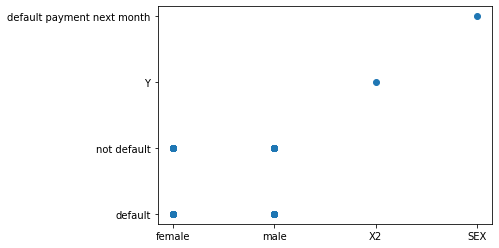

In [9]:
plt.scatter(x=data['SEX'], y=data['default payment next month'])
pass

<h1>Дропаем лишние столбики и  заного строим диалграмму для нахождения выброса</h1>

In [10]:
dropRows = data[
    ((data['SEX'] == 'X2') | (data['SEX'] == 'SEX') | (data['default payment next month'] == 'Y') | (data['default payment next month'] == 'default payment next month'))
].index
filteredData = data.drop(dropRows)

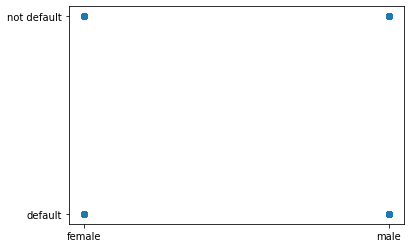

In [11]:
plt.scatter(x=filteredData['SEX'], y=filteredData['default payment next month'])
pass

<h2>Теперь у нас более равномерное распределение значений и нету выбросов которые нам не особо интересны</h2>
<h4> Теперь рассмотрим категориальные признаки </h4>

In [12]:
filteredData.describe(include=['category'])

,SEX,EDUCATION,default payment next month
count,30201,30201,30201
unique,2,4,2
top,female,university,not default
freq,18217,14107,23519


In [13]:
filteredData['SEX'].value_counts()

female    18217
male      11984
SEX           0
X2            0
Name: SEX, dtype: int64

In [14]:
filteredData['EDUCATION'].value_counts()

university         14107
graduate school    10672
high school         4952
other                470
EDUCATION              0
X3                     0
Name: EDUCATION, dtype: int64

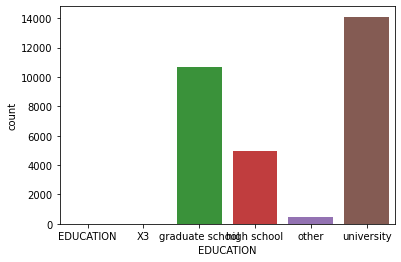

In [15]:
sns.countplot(x='EDUCATION',data=filteredData)
pass

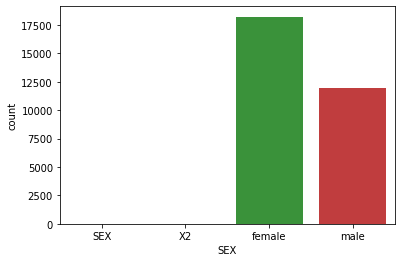

In [16]:
sns.countplot(x='SEX',data=filteredData)
pass

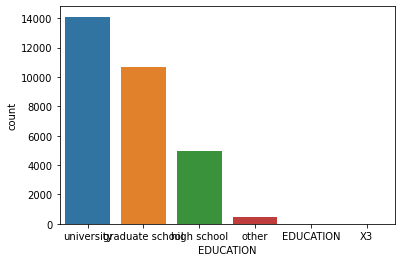

In [17]:
sns.countplot(x='EDUCATION',data=filteredData, order=filteredData['EDUCATION'].value_counts().index)
pass

In [18]:
for i in filteredData.columns:
    if filteredData[i].dtype == 'object':
        filteredData[i] = filteredData[i].astype('int64')

filteredData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30201 entries, 0 to 30202
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30201 non-null  int64   
 1   LIMIT_BAL                   30201 non-null  int64   
 2   SEX                         30201 non-null  category
 3   EDUCATION                   30201 non-null  category
 4   MARRIAGE                    30201 non-null  int64   
 5   AGE                         30201 non-null  int64   
 6   PAY_0                       30201 non-null  int64   
 7   PAY_2                       30201 non-null  int64   
 8   PAY_3                       30201 non-null  int64   
 9   PAY_4                       30201 non-null  int64   
 10  PAY_5                       30201 non-null  int64   
 11  PAY_6                       30201 non-null  int64   
 12  BILL_AMT1                   30201 non-null  int64   
 13  BILL_AMT2       

<h1>Вычисляем матрицу кореалиации</h1>


In [19]:
corrMat = filteredData.corr()
corrMat 

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,1.000000,0.025781,-0.030762,0.019679,-0.030847,-0.010728,-0.018823,-0.002375,-0.022670,-0.020165,...,0.024698,0.040046,0.016836,0.017024,0.010087,0.009335,0.038683,0.006852,0.000542,0.003685
LIMIT_BAL,0.025781,1.000000,-0.109024,0.146340,-0.271197,-0.296601,-0.285772,-0.267111,-0.249155,-0.235144,...,0.283612,0.294272,0.296017,0.290658,0.195705,0.178651,0.210122,0.203782,0.216735,0.219727
MARRIAGE,-0.030762,-0.109024,1.000000,-0.414769,0.020399,0.024421,0.032552,0.033364,0.035837,0.034540,...,-0.025951,-0.023924,-0.026313,-0.022284,-0.006241,-0.008453,-0.003520,-0.012547,-0.001526,-0.007224
AGE,0.019679,0.146340,-0.414769,1.000000,-0.039523,-0.050396,-0.053452,-0.049858,-0.053864,-0.048828,...,0.054607,0.051887,0.050184,0.048665,0.026285,0.022458,0.029600,0.021829,0.023410,0.020027
PAY_0,-0.030847,-0.271197,0.020399,-0.039523,1.000000,0.671046,0.573129,0.538270,0.508541,0.473786,...,0.179449,0.178715,0.180322,0.176729,-0.079303,-0.070163,-0.070217,-0.064074,-0.058036,-0.058918
PAY_2,-0.010728,-0.296601,0.024421,-0.050396,0.671046,1.000000,0.766644,0.662888,0.623214,0.576278,...,0.224119,0.222038,0.221308,0.219393,-0.080536,-0.058890,-0.055445,-0.046709,-0.036810,-0.036442
PAY_3,-0.018823,-0.285772,0.032552,-0.053452,0.573129,0.766644,1.000000,0.777506,0.686727,0.632586,...,0.227510,0.226995,0.225099,0.222317,0.001482,-0.066759,-0.053015,-0.045961,-0.035563,-0.035611
PAY_4,-0.002375,-0.267111,0.033364,-0.049858,0.538270,0.662888,0.777506,1.000000,0.820014,0.716631,...,0.245418,0.246138,0.243434,0.239677,-0.009369,-0.001747,-0.069082,-0.043298,-0.033783,-0.026512
PAY_5,-0.022670,-0.249155,0.035837,-0.053864,0.508541,0.623214,0.686727,0.820014,1.000000,0.816584,...,0.243696,0.271735,0.269986,0.262709,-0.006147,-0.003124,0.008976,-0.058010,-0.033543,-0.023010
PAY_6,-0.020165,-0.235144,0.034540,-0.048828,0.473786,0.576278,0.632586,0.716631,0.816584,1.000000,...,0.241429,0.266044,0.290743,0.285018,-0.001582,-0.005164,0.005765,0.018856,-0.046566,-0.025322


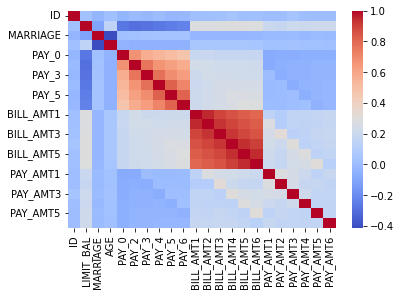

In [20]:
sns.heatmap(corrMat, cmap='coolwarm')
pass

<h2>Проверяем значения на NaN  и все остальное, далее обрабатываем категориальные признаки</h2>

In [21]:
filteredData.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [22]:
filteredData['default payment next month'] = pd.factorize(filteredData['default payment next month'])[0]
educationalDummies = pd.get_dummies(filteredData['EDUCATION'])
sexStatusDummies =  pd.get_dummies(filteredData['SEX'])

In [23]:
educationalDummies.head()

,EDUCATION,X3,graduate school,high school,other,university
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [24]:
sexStatusDummies.head()

,SEX,X2,female,male
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1


In [25]:
filteredData = pd.concat((filteredData, educationalDummies), axis=1)
filteredData = pd.concat((filteredData, sexStatusDummies), axis=1)
filteredData = filteredData.drop(['EDUCATION'], axis=1)
filteredData = filteredData.drop(['SEX'], axis=1)

<h1>Нормализуем значения</h1>

In [26]:
standartData = (filteredData - filteredData.mean(axis = 0))/filteredData.std(axis = 0)

In [27]:
standartData.describe()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT6,default payment next month,X3,graduate school,high school,other,university,X2,female,male
count,3.020100e+04,3.020100e+04,3.020100e+04,3.020100e+04,30201.000000,3.020100e+04,3.020100e+04,3.020100e+04,3.020100e+04,3.020100e+04,...,3.020100e+04,3.020100e+04,0.0,3.020100e+04,3.020100e+04,3.020100e+04,3.020100e+04,0.0,30201.000000,30201.000000
mean,9.034416e-17,9.222633e-17,-3.764340e-17,-5.646510e-18,0.000000,-6.022944e-17,7.528680e-18,-1.035194e-17,-5.270076e-17,-1.882170e-18,...,7.293409e-18,-8.281548e-17,NaN,-6.869921e-17,9.787284e-17,7.528680e-18,2.635038e-17,NaN,0.000000,0.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000,1.000000
min,-1.709512e+00,-1.213341e+00,-2.974497e+00,-1.570018e+00,-1.765519,-1.558214e+00,-1.531914e+00,-1.522070e+00,-1.530160e+00,-1.485481e+00,...,-2.936182e-01,-1.876070e+00,NaN,-7.392234e-01,-4.428545e-01,-1.257294e-01,-9.362205e-01,NaN,-1.232907,-0.811064
25%,-8.663631e-01,-9.051670e-01,-1.058555e+00,-8.109629e-01,-0.875525,-7.231572e-01,-6.967243e-01,-6.665485e-01,-6.478743e-01,-6.162787e-01,...,-2.873038e-01,5.330115e-01,NaN,-7.392234e-01,-4.428545e-01,-1.257294e-01,-9.362205e-01,NaN,-1.232907,-0.811064
50%,-1.534782e-04,-2.117757e-01,8.573874e-01,-1.603442e-01,0.014469,1.118994e-01,1.384654e-01,1.889734e-01,2.344115e-01,2.529238e-01,...,-2.090511e-01,5.330115e-01,NaN,-7.392234e-01,-4.428545e-01,-1.257294e-01,-9.362205e-01,NaN,0.811064,-0.811064
75%,8.660561e-01,5.586590e-01,8.573874e-01,5.987110e-01,0.014469,1.118994e-01,1.384654e-01,1.889734e-01,2.344115e-01,2.529238e-01,...,-6.810608e-02,5.330115e-01,NaN,1.352726e+00,-4.428545e-01,-1.257294e-01,1.068089e+00,NaN,0.811064,1.232907
max,1.732266e+00,6.413963e+00,2.773329e+00,4.719296e+00,7.134421,6.792353e+00,6.819983e+00,7.033149e+00,7.292697e+00,7.206544e+00,...,2.951153e+01,5.330115e-01,NaN,1.352726e+00,2.258003e+00,7.953323e+00,1.068089e+00,NaN,0.811064,1.232907


In [28]:
standartData.columns

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'X3', 'graduate school', 'high school',
       'other', 'university', 'X2', 'female', 'male'],
      dtype='object')

In [29]:
standartData.dropna()      
standartData.isna().sum()

ID                                0
LIMIT_BAL                         0
MARRIAGE                          0
AGE                               0
PAY_0                             0
PAY_2                             0
PAY_3                             0
PAY_4                             0
PAY_5                             0
PAY_6                             0
BILL_AMT1                         0
BILL_AMT2                         0
BILL_AMT3                         0
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT1                          0
PAY_AMT2                          0
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
default payment next month        0
X3                            30201
graduate school                   0
high school                       0
other                             0
university                  

In [30]:
X = standartData.drop(['X2','X3','default payment next month'],axis = 1)
Y = filteredData['default payment next month']

<h1>Разбиение на тестовые и обучающую выборки</h1>

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(24160, 6041)

<h2>Пробуем различное количество соседей</h2>

<h4>n = 5</h4>

In [32]:
knn = KNeighborsClassifier()
knn.set_params(n_neighbors=5)
knn.fit(X_train.values, Y_train)
y_train_pred = knn.predict(X_train.values)
y_test_pred = knn.predict(X_test.values)
print(confusion_matrix(Y_test,y_test_pred))
print(classification_report(Y_test,y_test_pred))
np.mean(Y_train != y_train_pred), np.mean(Y_test != y_test_pred)

[[ 464  876]
 [ 392 4309]]
              precision    recall  f1-score   support

           0       0.54      0.35      0.42      1340
           1       0.83      0.92      0.87      4701

    accuracy                           0.79      6041
   macro avg       0.69      0.63      0.65      6041
weighted avg       0.77      0.79      0.77      6041



(0.15691225165562914, 0.20989902334050653)

<h4>n = 7</h4>

In [33]:
knn = KNeighborsClassifier()
knn.set_params(n_neighbors=7)
knn.fit(X_train.values, Y_train)
y_train_pred = knn.predict(X_train.values)
y_test_pred = knn.predict(X_test.values)
print(confusion_matrix(Y_test,y_test_pred))
print(classification_report(Y_test,y_test_pred))
np.mean(Y_train != y_train_pred), np.mean(Y_test != y_test_pred)

[[ 454  886]
 [ 316 4385]]
              precision    recall  f1-score   support

           0       0.59      0.34      0.43      1340
           1       0.83      0.93      0.88      4701

    accuracy                           0.80      6041
   macro avg       0.71      0.64      0.65      6041
weighted avg       0.78      0.80      0.78      6041



(0.1658112582781457, 0.19897367985432876)

<h4>n = 12</h4>

In [34]:
knn = KNeighborsClassifier()
knn.set_params(n_neighbors=12)
knn.fit(X_train.values, Y_train)
y_train_pred = knn.predict(X_train.values)
y_test_pred = knn.predict(X_test.values)
print(confusion_matrix(Y_test,y_test_pred))
print(classification_report(Y_test,y_test_pred))
np.mean(Y_train != y_train_pred), np.mean(Y_test != y_test_pred)

[[ 477  863]
 [ 298 4403]]
              precision    recall  f1-score   support

           0       0.62      0.36      0.45      1340
           1       0.84      0.94      0.88      4701

    accuracy                           0.81      6041
   macro avg       0.73      0.65      0.67      6041
weighted avg       0.79      0.81      0.79      6041



(0.17603476821192052, 0.19218672405230922)

<h1>Классификатор SVС</h1> 

<h2>Сначала используем исходные</h2> 

In [35]:
X = standartData.drop(['X2','X3','default payment next month'],axis = 1)
Y = filteredData['default payment next month']

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(24160, 6041)

In [37]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [38]:
y_pred = svclassifier.predict(X_test)

In [39]:
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
np.mean(Y_train != y_train_pred), np.mean(Y_test != y_test_pred)

[[ 329 1011]
 [ 136 4565]]
              precision    recall  f1-score   support

           0       0.71      0.25      0.36      1340
           1       0.82      0.97      0.89      4701

    accuracy                           0.81      6041
   macro avg       0.76      0.61      0.63      6041
weighted avg       0.79      0.81      0.77      6041



(0.17603476821192052, 0.19218672405230922)

<h2>Изменяем размеры выборки</h2>

In [41]:
X = standartData.drop(['X2','X3','default payment next month'],axis = 1)
Y = filteredData['default payment next month']

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(21140, 9061)

In [40]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)
y_pred = svclassifier.predict(X_test)

In [41]:
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
np.mean(Y_train != y_train_pred), np.mean(Y_test != y_test_pred)

[[ 329 1011]
 [ 136 4565]]
              precision    recall  f1-score   support

           0       0.71      0.25      0.36      1340
           1       0.82      0.97      0.89      4701

    accuracy                           0.81      6041
   macro avg       0.76      0.61      0.63      6041
weighted avg       0.79      0.81      0.77      6041



(0.17603476821192052, 0.19218672405230922)

<h2>Сбалансируем классы между собой и проведем еще несколько обучений KNN и SVM методами</h2> 

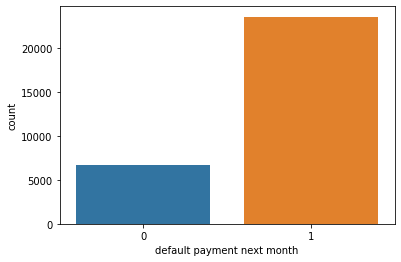

In [42]:
sns.countplot(x = 'default payment next month', data = filteredData)
pass

In [43]:
zeros = filteredData[filteredData['default payment next month'] == 0]
ones =  filteredData[filteredData['default payment next month'] == 1]
size = zeros['default payment next month'].value_counts()

In [44]:
ones = ones.sample(size[0])

In [45]:
cutting_data = pd.concat([zeros,ones])
cutting_data

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT6,default payment next month,X3,graduate school,high school,other,university,X2,female,male
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,0,0,1,0,1,0
1,2,120000,2,26,-1,2,0,0,0,2,...,2000,0,0,0,0,0,1,0,1,0
13,14,70000,2,30,1,2,2,0,0,2,...,0,0,0,0,0,0,1,0,0,1
16,17,20000,2,24,0,0,2,2,2,2,...,0,0,0,1,0,0,0,0,0,1
21,22,120000,1,39,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27526,27324,50000,2,44,0,0,0,2,0,0,...,1000,1,0,0,1,0,0,0,0,1
11458,11256,240000,1,44,0,0,0,0,0,0,...,1000,1,0,0,0,0,1,0,0,1
28477,28275,430000,1,42,0,0,0,0,0,0,...,3500,1,0,0,0,0,1,0,1,0
26056,25854,200000,2,37,-1,-1,-1,-1,0,-1,...,3603,1,0,0,0,0,1,0,1,0


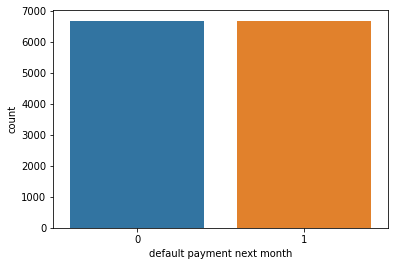

In [46]:
sns.countplot(x = 'default payment next month', data = cutting_data)
pass

In [47]:
filteredData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30201 entries, 0 to 30202
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30201 non-null  int64
 1   LIMIT_BAL                   30201 non-null  int64
 2   MARRIAGE                    30201 non-null  int64
 3   AGE                         30201 non-null  int64
 4   PAY_0                       30201 non-null  int64
 5   PAY_2                       30201 non-null  int64
 6   PAY_3                       30201 non-null  int64
 7   PAY_4                       30201 non-null  int64
 8   PAY_5                       30201 non-null  int64
 9   PAY_6                       30201 non-null  int64
 10  BILL_AMT1                   30201 non-null  int64
 11  BILL_AMT2                   30201 non-null  int64
 12  BILL_AMT3                   30201 non-null  int64
 13  BILL_AMT4                   30201 non-null  int64
 14  BILL_A

<h2>Используем сбалансированные данные и все те же классификаторы</h2>

In [48]:
standartData = (cutting_data - cutting_data.mean(axis = 0))/cutting_data.std(axis = 0)

In [49]:
X = standartData.drop(['X2','X3','default payment next month'],axis = 1)
Y = cutting_data['default payment next month']

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(10691, 2673)

In [51]:
knn = KNeighborsClassifier()
knn.set_params(n_neighbors=5)
knn.fit(X_train.values, Y_train)
y_train_pred = knn.predict(X_train.values)
y_test_pred = knn.predict(X_test.values)
print(confusion_matrix(Y_test,y_test_pred))
print(classification_report(Y_test,y_test_pred))
np.mean(Y_train != y_train_pred), np.mean(Y_test != y_test_pred)

[[865 476]
 [409 923]]
              precision    recall  f1-score   support

           0       0.68      0.65      0.66      1341
           1       0.66      0.69      0.68      1332

    accuracy                           0.67      2673
   macro avg       0.67      0.67      0.67      2673
weighted avg       0.67      0.67      0.67      2673



(0.2348704517818726, 0.33108866442199775)

In [52]:
knn = KNeighborsClassifier()
knn.set_params(n_neighbors=7)
knn.fit(X_train.values, Y_train)
y_train_pred = knn.predict(X_train.values)
y_test_pred = knn.predict(X_test.values)
print(confusion_matrix(Y_test,y_test_pred))
print(classification_report(Y_test,y_test_pred))
np.mean(Y_train != y_train_pred), np.mean(Y_test != y_test_pred)

[[874 467]
 [358 974]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68      1341
           1       0.68      0.73      0.70      1332

    accuracy                           0.69      2673
   macro avg       0.69      0.69      0.69      2673
weighted avg       0.69      0.69      0.69      2673



(0.25236179964456085, 0.30864197530864196)

In [53]:
knn = KNeighborsClassifier()
knn.set_params(n_neighbors=12)
knn.fit(X_train.values, Y_train)
y_train_pred = knn.predict(X_train.values)
y_test_pred = knn.predict(X_test.values)
print(confusion_matrix(Y_test,y_test_pred))
print(classification_report(Y_test,y_test_pred))
np.mean(Y_train != y_train_pred), np.mean(Y_test != y_test_pred)

[[881 460]
 [409 923]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1341
           1       0.67      0.69      0.68      1332

    accuracy                           0.67      2673
   macro avg       0.68      0.67      0.67      2673
weighted avg       0.68      0.67      0.67      2673



(0.27677485735665514, 0.32510288065843623)

In [54]:
X = standartData.drop(['X2','X3','default payment next month'],axis = 1)
Y = cutting_data['default payment next month']

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(10691, 2673)

In [56]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)
y_pred = svclassifier.predict(X_test)

In [57]:
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
np.mean(Y_train != y_train_pred), np.mean(Y_test != y_test_pred)

[[ 755  586]
 [ 259 1073]]
              precision    recall  f1-score   support

           0       0.74      0.56      0.64      1341
           1       0.65      0.81      0.72      1332

    accuracy                           0.68      2673
   macro avg       0.70      0.68      0.68      2673
weighted avg       0.70      0.68      0.68      2673



(0.27677485735665514, 0.32510288065843623)